In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

DATASET_TAGS = ['tabula-muris-heart']#, 'tabula-muris-marrow_P7_3', 'peripheal-blood', 'kumar-4-hard', 'kumar-8-hard']
N_MARKERS = 50

In [13]:
for dataset in DATASET_TAGS:
	scores_path = './results/{}/clf_scores.pickle'.format(dataset)
	with open(scores_path, 'rb') as handle:
		scores = pickle.load(handle)

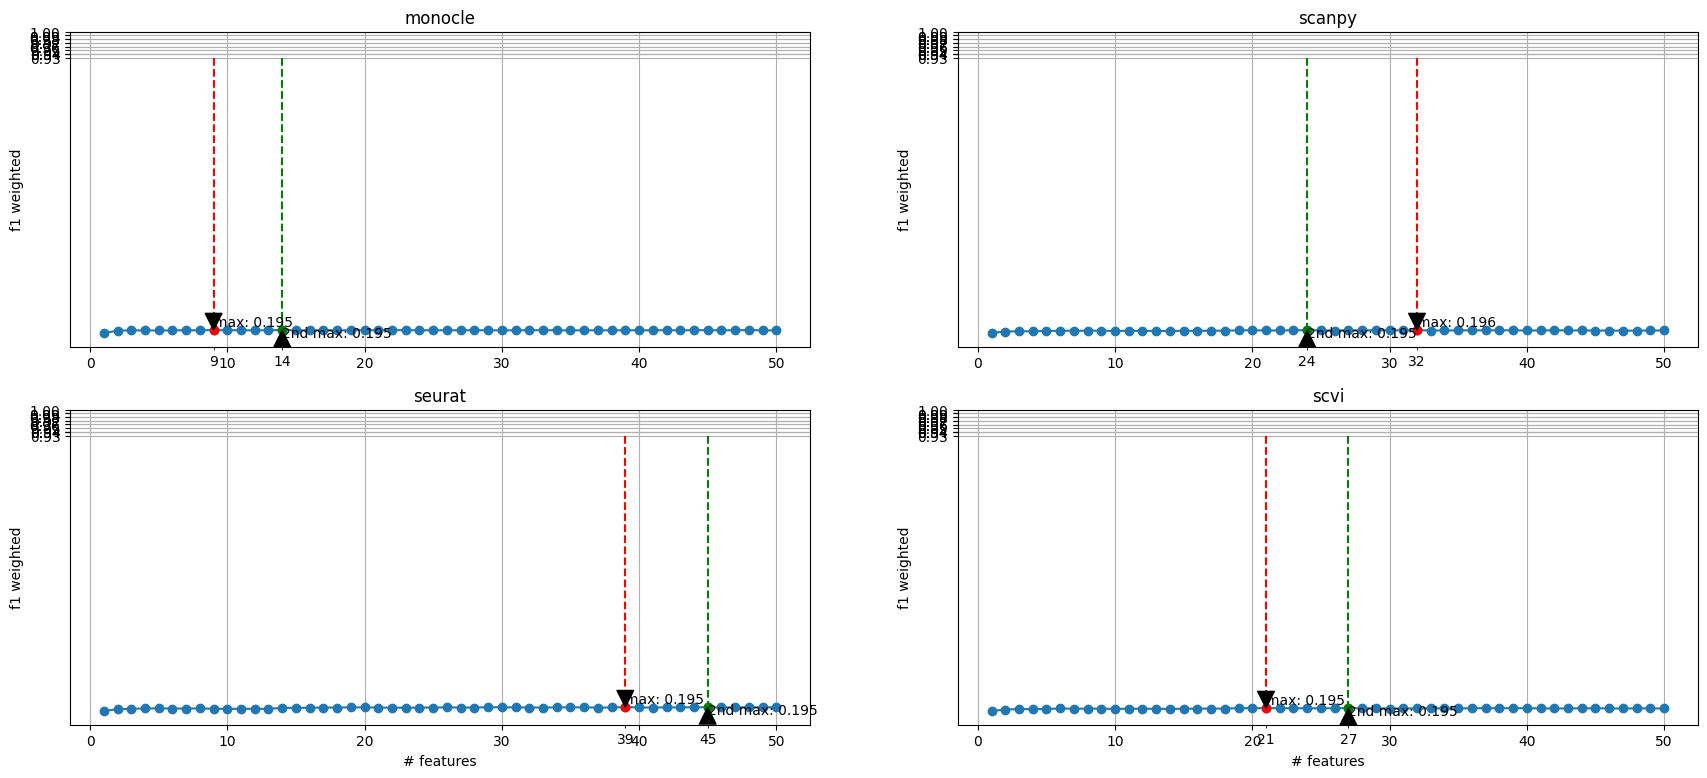

In [16]:
tools = scores.keys()
fig, ax = plt.subplots(2, 2, figsize=(21, 9))
for i, tool in enumerate(tools):
    max_i = np.argmax(scores[tool]['mean'])
    second_max = np.argsort(scores[tool]['mean'])[-2]
    
        
    ax[i//2, i%2].plot([i for i in range(1, N_MARKERS+1)], scores[tool]['mean'], marker='o')
    
    # print max max in red
    ax[i//2, i%2].plot([max_i+1], [scores[tool]['mean'][max_i]], marker='o', color='red')
    
    # print second max in green
    ax[i//2, i%2].plot([second_max+1], [scores[tool]['mean'][second_max]], marker='o', color='green')
    
    # annotation for max
    ax[i//2, i%2].annotate('max: {}'.format(round(scores[tool]['mean'][max_i], 3)), xy=(max_i+1, scores[tool]['mean'][max_i]), xytext=(max_i+1, scores[tool]['mean'][max_i]+0.01), arrowprops=dict(facecolor='black', shrink=0.05))
    
    # annotation for second max
    ax[i//2, i%2].annotate('2nd max: {}'.format(round(scores[tool]['mean'][second_max], 3)), xy=(second_max+1, scores[tool]['mean'][second_max]), xytext=(second_max+1, scores[tool]['mean'][second_max]-0.02), arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i//2, i%2].set_ylabel("f1 weighted")
    
    # Only last two plots have x label (it's the same for all)
    if (i>1):
        ax[i//2, i%2].set_xlabel("# features")
    # print x tick for max 
    ax[i//2, i%2].plot([max_i+1, max_i+1], [0.930, scores[tool]['mean'][max_i]], linestyle='--', color='red')
    ax[i//2, i%2].plot([second_max+1, second_max+1], [0.930, scores[tool]['mean'][second_max]], linestyle='--', color='green')
    ax[i//2, i%2].set_xticks([max_i+1, second_max+1], [max_i+1, second_max+1], minor=True)
    # Same scale for all plots
    ax[i//2, i%2].set_yticks([round(i, 2) for i in np.arange(0.930, 1, 0.005)])
    # Set title
    ax[i//2, i%2].set_title(tool)
    ax[i//2, i%2].grid()